In [1]:
import numpy as np
import pandas as pd

file_path = "/Users/aleksandra.rancic/Desktop/Doctoral_School/medical_insurance.csv" # Change the path
df = pd.read_csv(file_path)
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [2]:
# Loads the dataset into a Pandas DataFrame from a CSV file.
# Displays the first 10 rows to get an initial look at the dataset.
# Dataset includes demographics, health factors, and medical charges.
# No obvious issues with the dataset at first glance.

In [3]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
2762,21,female,32.680,2,no,northwest,26018.95052
2763,51,male,37.000,0,no,southwest,8798.59300
2764,22,female,31.020,3,yes,southeast,35595.58980
2765,47,male,36.080,1,yes,southeast,42211.13820
2766,18,male,23.320,1,no,southeast,1711.02680
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
# Provides a summary of the dataset, including the number of entries and data types.
# Confirms there are 2772 rows and no missing values in any column.
# Shows data types: age, children (integers), bmi, charges(floats), and sex, smoker, region (categorical).

In [6]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Computes summary statistics for numerical columns.
# Age ranges from 18 to 64, with an average of 39 years.
# BMI has a wide range (15.96 to 53.13), suggesting outliers.
# Medical charges vary significantly, indicating a mix of low-cost and high-cost patients.

In [8]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [9]:
# Checking number of unique patients
# Counts the number of uniwue values per column to check data diversity.
# Age has 47 unique values (confirms a wide spread).
# sex and smoker are binary (only 2 unique values);
# BMI has 548 unique values, meaning most people have a different BMI;
# Charges is highly variable with 1337 unique values (almost unique per individual);

In [10]:
rows_with_missing = df[df.isnull().any(axis=1)]
print(rows_with_missing)

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


In [11]:
# No missing values in the dataset, so no additional cleaning is needed.

In [12]:
duplicates = df[df.duplicated()]
print(duplicates)

      age     sex     bmi  children smoker     region      charges
581    19    male  30.590         0     no  northwest   1639.56310
1338   23    male  34.400         0     no  southwest   1826.84300
1339   56  female  39.820         0     no  southeast  11090.71780
1340   27    male  42.130         0    yes  southeast  39611.75770
1341   19    male  24.600         1     no  southwest   1837.23700
...   ...     ...     ...       ...    ...        ...          ...
2767   47  female  45.320         1     no  southeast   8569.86180
2768   21  female  34.600         0     no  southwest   2020.17700
2769   19    male  26.030         1    yes  northwest  16450.89470
2770   23    male  18.715         0     no  northwest  21595.38229
2771   54    male  31.600         0     no  southwest   9850.43200

[1435 rows x 7 columns]


In [13]:
df_2 = df.drop_duplicates(keep='first')
df_2.reset_index(drop=True, inplace=True)

In [14]:
df_2.shape

(1337, 7)

In [16]:

df_2.to_csv("/Users/aleksandra.rancic/Desktop/Doctoral_School/medical_insurance_cleaned.csv")  # Change the path!

In [18]:
# Create new encoded columns for 'sex' and 'smoker' (binary encoding)
df_2.loc[:, 'sex_encoded'] = df_2['sex'].map({'male': 0, 'female': 1})
df_2.loc[:, 'smoker_encoded'] = df_2['smoker'].map({'no': 0, 'yes': 1})

# One-hot encoding for 'region' (adds new columns without removing 'region')
region_dummies = pd.get_dummies(df_2['region'], prefix='region') # boolean
region_dummies = region_dummies.astype(int)

# Concatenate the new one-hot encoded columns to the DataFrame
df_2 = pd.concat([df_2, region_dummies], axis=1)

In [19]:
df_2.head(20)

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_northeast,region_northwest,region_southeast,region_southwest,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0,0,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0,0,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,0,1,0,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,0,1,0,0,0,1,0,0
5,31,female,25.740,0,no,southeast,3756.62160,1,0,0,0,1,0,0,0,1,0
6,46,female,33.440,1,no,southeast,8240.58960,1,0,0,0,1,0,0,0,1,0
7,37,female,27.740,3,no,northwest,7281.50560,1,0,0,1,0,0,0,1,0,0
8,37,male,29.830,2,no,northeast,6406.41070,0,0,1,0,0,0,1,0,0,0
9,60,female,25.840,0,no,northwest,28923.13692,1,0,0,1,0,0,0,1,0,0


In [20]:
# You can also use NumPy to compute basic statistics (mean, median, std dev)

age = df_2['age'].to_numpy()
bmi = df_2['bmi'].to_numpy()
charges = df_2['charges'].to_numpy()

print(np.mean(age), np.median(age), np.std(age))

39.222139117427076 39.0 14.039079570428925


In [27]:
# Or to identify outliers

#Compute Z-scores
z_scores = np.abs((charges - np.mean(charges)) / np.std(charges))

outliers = charges[z_scores > 3]
print("Number of outliers in charges:", len(outliers))
print("Outlier values:", outliers)

Number of outliers in charges: 7
Outlier values: [51194.55914 63770.42801 58571.07448 55135.40209 52590.82939 60021.39897
 62592.87309]


In [28]:
# Or we can find the outlier indices

outliers = df_2[z_scores > 3]
print("Number of outliers in charges:", len(outliers))
for index, row in outliers.iterrows():
    print(f"Outlier at row {index}, column 'charges': value = {row['charges']}")

Number of outliers in charges: 7
Outlier at row 34, column 'charges': value = 51194.55914
Outlier at row 543, column 'charges': value = 63770.42801
Outlier at row 577, column 'charges': value = 58571.07448
Outlier at row 818, column 'charges': value = 55135.40209
Outlier at row 1145, column 'charges': value = 52590.82939
Outlier at row 1229, column 'charges': value = 60021.39897
Outlier at row 1299, column 'charges': value = 62592.87309


In [29]:
# outliers in bmi

z_scores = np.abs((bmi - np.mean(bmi)) / np.std(bmi))

outliers = bmi[z_scores > 3]
print("Number of outliers in bmi:", len(outliers))
print("Outlier values:", outliers)

Number of outliers in bmi: 4
Outlier values: [49.06 50.38 52.58 53.13]


In [30]:
outliers = df_2[z_scores > 3]
print("Number of outliers in charges:", len(outliers))
for index, row in outliers.iterrows():
    print(f"Outlier at row {index}, column 'bmi': value = {row['bmi']}")

Number of outliers in charges: 4
Outlier at row 116, column 'bmi': value = 49.06
Outlier at row 846, column 'bmi': value = 50.38
Outlier at row 1046, column 'bmi': value = 52.58
Outlier at row 1316, column 'bmi': value = 53.13


In [31]:
# Correlation between features

# Shows some relationships between numerical variables (useful for feature selection).
# Helps determine if age, BMI, or children count influences medical charges/

data_numeric = df_2[['age', 'bmi', 'children', 'charges']].to_numpy()
correlation_matrix = np.corrcoef(data_numeric, rowvar=False)
print(correlation_matrix)

# We will come to correlation matrix later once again to show it with correlation heatmap!

[[1.         0.10934361 0.04153621 0.29830821]
 [0.10934361 1.         0.01275466 0.19840083]
 [0.04153621 0.01275466 1.         0.06738935]
 [0.29830821 0.19840083 0.06738935 1.        ]]


In [32]:
# Feature scaling with Min-Max Normalization (Storing as new columns)

# ensures numerical features like age, bmi, and charges are scaled properly.
# This is useful for improving model performance in linear regression.

# here we scale features to the [0,1] interval

df_2['age_scaled'] = (df_2['age'] - np.min(df_2['age'])) / (np.max(df_2['age']) - np.min(df_2['age']))
df_2['bmi_scaled'] = (df_2['bmi'] - np.min(df_2['bmi'])) / (np.max(df_2['bmi']) - np.min(df_2['bmi']))
df_2['charges_scaled'] = (df_2['charges'] - np.min(df_2['charges'])) / (np.max(df_2['charges']) - np.min(df_2['charges']))

# Check the new scaled columns
df_2[['age', 'age_scaled', 'bmi', 'bmi_scaled', 'charges', 'charges_scaled']].head()

,age,age_scaled,bmi,bmi_scaled,charges,charges_scaled
0,19,0.021739,27.900,0.321227,16884.92400,0.251611
1,18,0.000000,33.770,0.479150,1725.55230,0.009636
2,28,0.217391,33.000,0.458434,4449.46200,0.053115
3,33,0.326087,22.705,0.181464,21984.47061,0.333010
4,32,0.304348,28.880,0.347592,3866.85520,0.043816


##### Scaling = process of transforming numerical features to a common scale without distorting differences in the range of values     

Min-Max Normalization formula:               

$$
x_{\text{scaled}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$


In [33]:
df_2.head()

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_northeast,region_northwest,region_southeast,region_southwest,region_northeast,region_northwest,region_southeast,region_southwest,age_scaled,bmi_scaled,charges_scaled
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0,0,0,1,0,0,0,1,0.021739,0.321227,0.251611
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0,0,1,0,0,0,1,0,0.000000,0.479150,0.009636
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0,0,1,0,0,0,1,0,0.217391,0.458434,0.053115
3,33,male,22.705,0,no,northwest,21984.47061,0,0,0,1,0,0,0,1,0,0,0.326087,0.181464,0.333010
4,32,male,28.880,0,no,northwest,3866.85520,0,0,0,1,0,0,0,1,0,0,0.304348,0.347592,0.043816


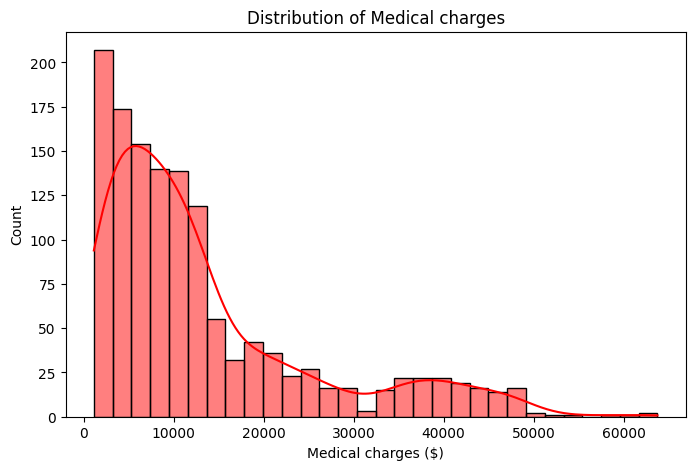

In [35]:
# Distribution of charges
# Visualize how medical charges are distributed; identifies skewness, outliers, and common cost ranges.

import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df_2['charges'], bins=30, kde=True, color='red')

plt.xlabel('Medical charges ($)')
plt.ylabel('Count')
plt.title('Distribution of Medical charges')

plt.show()

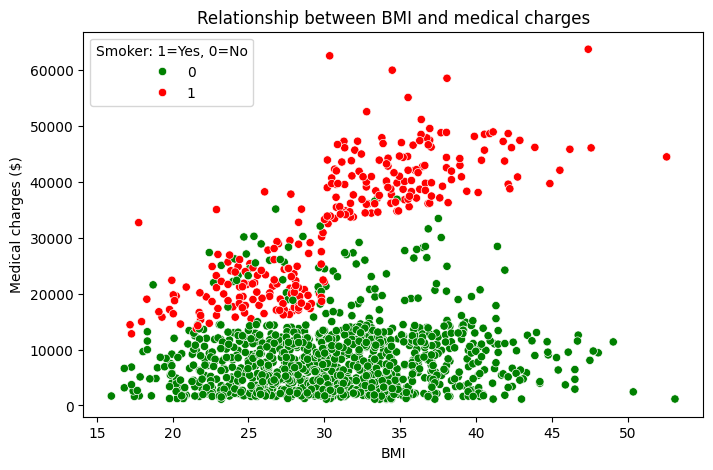

In [36]:
# Relationship between BMI and charges

plt.figure(figsize = (8,5))
sns.scatterplot(x=df_2['bmi'], y=df_2['charges'], hue=df_2['smoker_encoded'], palette={1: 'red', 0: 'green'})

plt.xlabel('BMI')
plt.ylabel('Medical charges ($)')
plt.title('Relationship between BMI and medical charges')
plt.legend(title='Smoker: 1=Yes, 0=No')
plt.show()


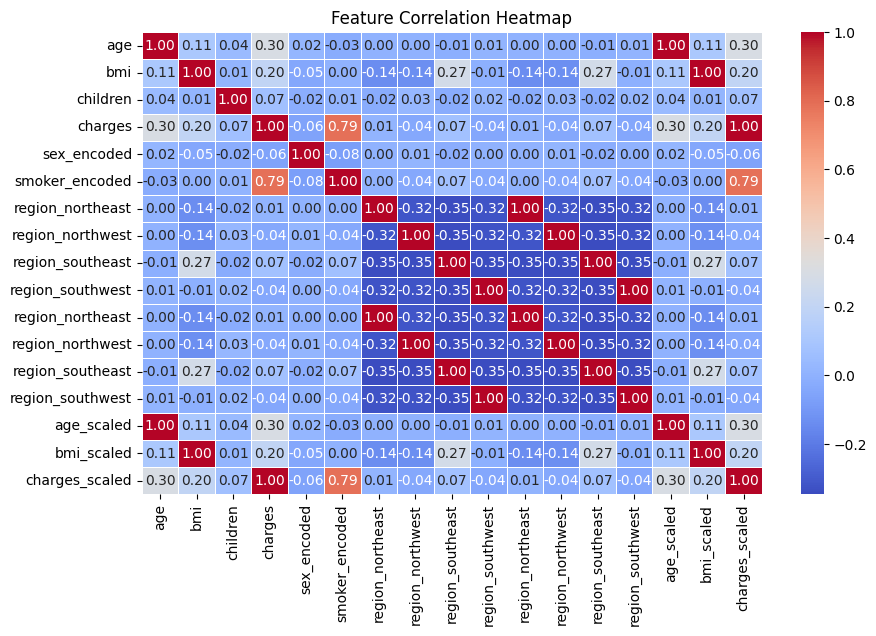

In [37]:
# Correlation heatmap (feature relationships)

# Shows which features are most related to each other.
# Helps with feature selection for regression models.

# Select only numeric columns for correlation matrix
numeric_df_2 = df_2.select_dtypes(include=['int64', 'float64', 'bool'])

# Compute correlation
correlation_matrix = numeric_df_2.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()

##### The correlation matrix reveals how strongly features are related to each other.
##### A value closer to 1 or -1 indicates strong relationship.
##### Values near 0 indicate little or no correlation.

##### Strongest correlations
- smoker_encoded and charges (strong positive correlation)
- age and charges
- bmi and charges

##### Weak or negligible correlation
- sex_encoded and charges
- children and charges
- region_* and charges

##### 1. Feature selection for Classification
Target variable: smoker_encoded (binary classification: 1=smoker, 0=non-smoker)
Goal: identify features that best predict whether a person smokes.

charges_scaled is the strongest predictor.
bmi_scaled, age_scale, sex_encoded, children, and region_* have low or negligible correlations

In [50]:
classification_features = ['charges_scaled']
classification_target = 'smoker_encoded'

X_classification = df_2[classification_features]
y_classification = df_2[classification_target]

##### 2. Feature selection for Regression
Target variable: charges_scaled (medical costs)
Goal: identify features that best predict medical charges.

smoker_encoded is the most important feature.
age_scaled and bmi_scaled are moderately useful.
sex_encoded, children, and region_* have little impact.


In [51]:
regression_features = ['smoker_encoded', 'age_scaled', 'bmi_scaled']
regression_target = 'charges_scaled'

X_regression = df_2[regression_features]
y_regression = df_2[regression_target]

1. Train-Test Split for Classification


In [53]:
from sklearn.model_selection import train_test_split

X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_classification, y_classification, test_size=0.2, random_state=123, stratify=y_classification)

print("Classification-training set:", X_train_cl.shape)
print("Classification-test set:", X_test_cl.shape)

Classification-training set: (1069, 1)
Classification-test set: (268, 1)


2. Train-Test split for Regression

In [55]:
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=123)

print("Regression-training set:", X_train_reg.shape)
print("Regression-test set:", X_test_reg.shape)

Regression-training set: (1069, 3)
Regression-test set: (268, 3)


#### Train Logistic regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression()
log_model.fit(X_train_cl, y_train_cl)

y_pred_log = log_model.predict(X_test_cl)

# Evaluate model
accuracy = accuracy_score(y_test_cl, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test_cl, y_pred_log))

Logistic Regression Accuracy: 0.8955
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       213
           1       0.86      0.58      0.70        55

    accuracy                           0.90       268
   macro avg       0.88      0.78      0.82       268
weighted avg       0.89      0.90      0.89       268



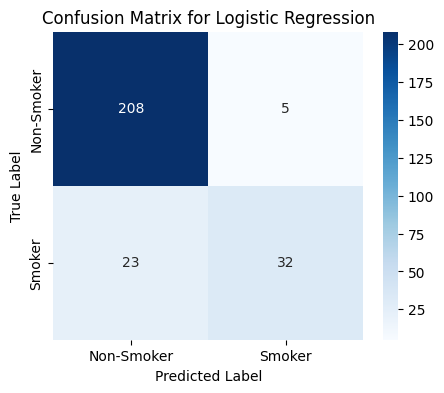

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test_cl, y_pred_log)

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Smoker", "Smoker"], yticklabels=["Non-Smoker", "Smoker"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

#### Train Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=123)
rf_model.fit(X_train_cl, y_train_cl)

y_pred_rf = rf_model.predict(X_test_cl)

accuracy = accuracy_score(y_test_cl, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test_cl, y_pred_rf))

Random Forest Accuracy: 0.9067
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       213
           1       0.78      0.76      0.77        55

    accuracy                           0.91       268
   macro avg       0.86      0.85      0.86       268
weighted avg       0.91      0.91      0.91       268



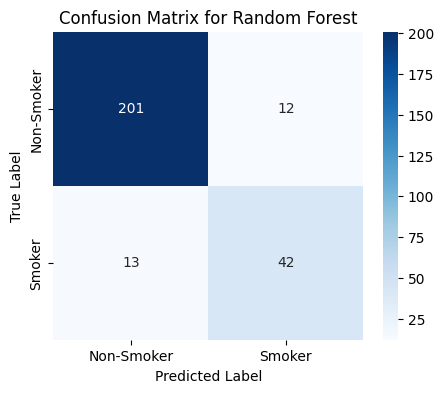

In [59]:
# Compute confusion matrix
cm = confusion_matrix(y_test_cl, y_pred_rf)

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Smoker", "Smoker"], yticklabels=["Non-Smoker", "Smoker"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

#### Train XGBoost

In [61]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, eval_metric='mlogloss', random_state=123)
xgb_model.fit(X_train_cl, y_train_cl)

y_pred_xgb = xgb_model.predict(X_test_cl)

accuracy = accuracy_score(y_test_cl, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test_cl, y_pred_xgb))

XGBoost Accuracy: 0.9328
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       213
           1       0.84      0.84      0.84        55

    accuracy                           0.93       268
   macro avg       0.90      0.90      0.90       268
weighted avg       0.93      0.93      0.93       268



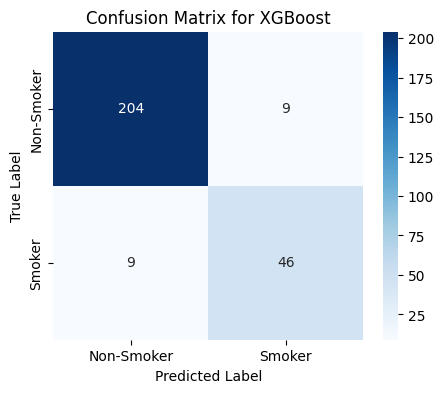

In [62]:
# Compute confusion matrix
cm = confusion_matrix(y_test_cl, y_pred_xgb)

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Smoker", "Smoker"], yticklabels=["Non-Smoker", "Smoker"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost')
plt.show()

Plot accuracies and F1-scores

In [63]:
from sklearn.metrics import f1_score

model_names = ['Logistic regression', 'Random forest', 'XGBoost']

accuracies = [
    accuracy_score(y_test_cl, y_pred_log),
    accuracy_score(y_test_cl, y_pred_rf),
    accuracy_score(y_test_cl, y_pred_xgb)
]

f1_scores = [
    f1_score(y_test_cl, y_pred_log, average='macro'),
    f1_score(y_test_cl, y_pred_rf, average='macro'),
    f1_score(y_test_cl, y_pred_xgb, average='macro')
]

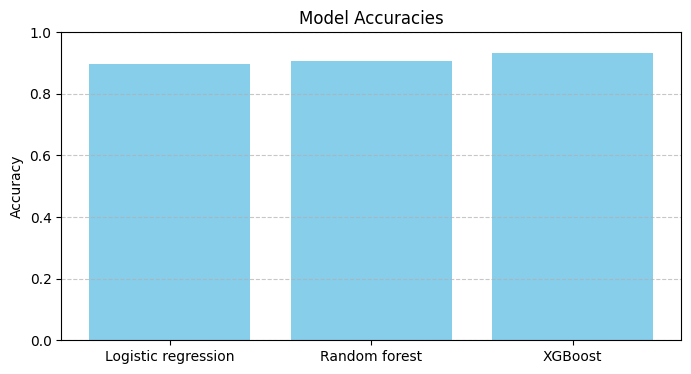

In [64]:
# Plot accuracies
plt.figure(figsize=(8, 4))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


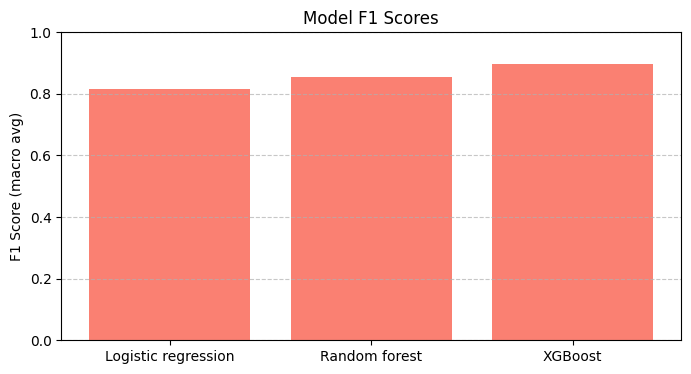

In [65]:
# Plot F1-scores
plt.figure(figsize=(8, 4))
plt.bar(model_names, f1_scores, color='salmon')
plt.ylim(0, 1)
plt.ylabel('F1 Score (macro avg)')
plt.title('Model F1 Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Train Linear regression model

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lin_model = LinearRegression()
lin_model.fit(X_train_reg, y_train_reg)

# Predict on test set
y_pred_lin = lin_model.predict(X_test_reg)

# Evaluate model
mae = mean_absolute_error(y_test_reg, y_pred_lin)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_lin))
r2 = r2_score(y_test_reg, y_pred_lin)

print(f"Linear Regression MAE: {mae:.4f}")
print(f"Linear Regression RMSE: {rmse:.4f}")
print(f"Linear Regression R^2: {r2:.4f}")

Linear Regression MAE: 0.0634
Linear Regression RMSE: 0.0894
Linear Regression R^2: 0.7972


#### Train Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=123)
rf_regressor.fit(X_train_reg, y_train_reg)

y_pred_rf = rf_regressor.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))
r2 = r2_score(y_test_reg, y_pred_rf)

print(f"Random Forest Regressor MAE: {mae:.4f}")
print(f"Random Forest Regressor RMSE: {rmse:.4f}")
print(f"Random Forest Regressor R^2: {r2:.4f}")

Random Forest Regressor MAE: 0.0453
Random Forest Regressor RMSE: 0.0734
Random Forest Regressor R^2: 0.8634


In [72]:
from xgboost import XGBRegressor

xgb_regressor = XGBRegressor(n_estimators=100, random_state=123)
xgb_regressor.fit(X_train_reg, y_train_reg)

y_pred_xgb = xgb_regressor.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_xgb))
r2 = r2_score(y_test_reg, y_pred_xgb)

print(f"XGBoost Regressor MAE: {mae:.4f}")
print(f"XGBoost Regressor RMSE: {rmse:.4f}")
print(f"XGBoost Regressor R^2: {r2:.4f}")

XGBoost Regressor MAE: 0.0533
XGBoost Regressor RMSE: 0.0896
XGBoost Regressor R^2: 0.7960


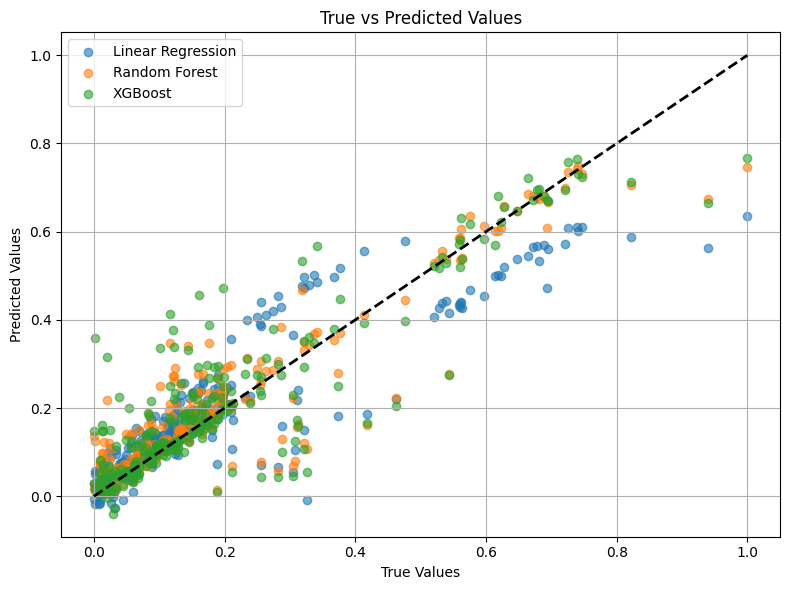

In [73]:
# Plot: True vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_lin, label='Linear Regression', alpha=0.6)
plt.scatter(y_test_reg, y_pred_rf, label='Random Forest', alpha=0.6)
plt.scatter(y_test_reg, y_pred_xgb, label='XGBoost', alpha=0.6)

plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)  # 45° line
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

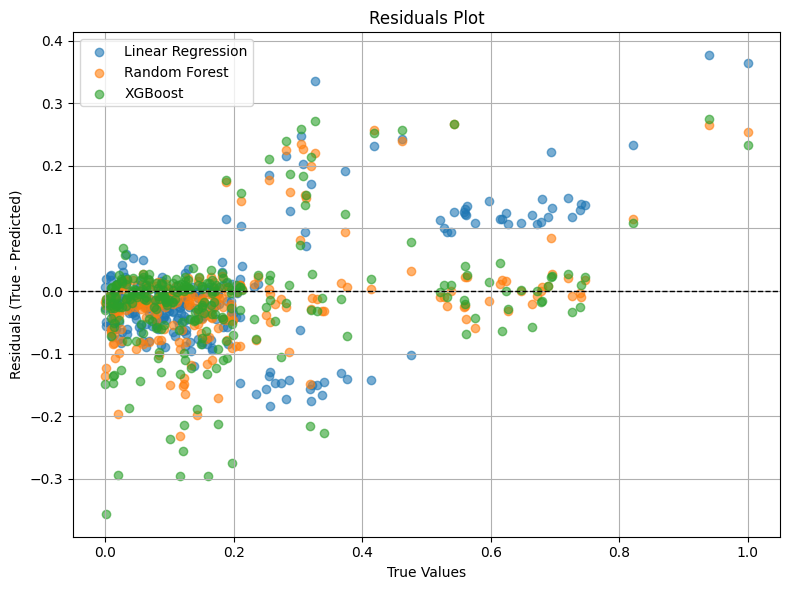

In [74]:
# Residuals
res_lin = y_test_reg - y_pred_lin
res_rf = y_test_reg - y_pred_rf
res_xgb = y_test_reg - y_pred_xgb

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, res_lin, label='Linear Regression', alpha=0.6)
plt.scatter(y_test_reg, res_rf, label='Random Forest', alpha=0.6)
plt.scatter(y_test_reg, res_xgb, label='XGBoost', alpha=0.6)

plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.xlabel("True Values")
plt.ylabel("Residuals (True - Predicted)")
plt.title("Residuals Plot")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()